#### UV VIS CORE HEAD vs. 8 CHL

In [1]:
library(ggplot2)        # plotting & data
library(dplyr)          # data manipulation
library(tidyr)          # data re-shaping
library(magrittr)       # pipe operator
library(gridExtra)      # provides side-by-side plotting
library(dplyr)          # dplyr for pipe operations
library(moments)        # bonett.test for normality
library(ggQC)           # to create xMR and iMR charts
library(repr)           # change plot size
library(nortest)        # anderson darling test
library(climtrends)     # FindOutliersTietjenMooreTest


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Change plot size to 12 x 6
options(repr.plot.width=25, repr.plot.height=10)

In [3]:
dfr <- read.csv("LEGO_script_UVVIS_rawdata.csv")
names(dfr) <- c("ROW", sapply(seq(1,12), paste0), "METHOD", "PLATE")
head(dfr)

,ROW,1,2,3,4,5,6,7,8,9,10,11,12,METHOD,PLATE
,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,A,NA,0.076,0.099,0.194,0.367,0.808,1.874,3.644,0.366,0.057,2.854,OVRFLW,MANUAL,1
2,B,NA,0.076,0.098,0.179,0.358,0.806,1.830,3.546,2.665,0.058,0.057,0.057,MANUAL,1
3,C,NA,0.058,0.069,0.108,0.205,0.429,0.964,1.877,OVRFLW,0.063,1.768,0.31,MANUAL,1
4,D,NA,0.061,0.072,0.117,0.230,0.455,0.927,1.891,0.069,0.061,0.067,2.628,MANUAL,1
5,E,NA,0.050,0.057,0.075,0.128,0.250,0.529,1.692,0.314,0.06,0.040,2.906,MANUAL,1
6,F,NA,0.049,0.054,0.076,0.126,0.246,0.518,1.676,2.627,0.056,2.915,0.072,MANUAL,1


In [4]:
df <- dfr %>% 
    #select_if(grepl("[[:digit:]]", names(.))) %>%
    mutate_if(grepl('OVRFLW',.), ~replace(., grepl('OVRFLW', .), 4)) %>%
    mutate(across(c(`9`, `10`, `11`, `12`), as.numeric))
df

ROW,1,2,3,4,5,6,7,8,9,10,11,12,METHOD,PLATE
<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
A,NA,0.076,0.099,0.194,0.367,0.808,1.874,3.644,0.366,0.057,2.854,4.000,MANUAL,1
B,NA,0.076,0.098,0.179,0.358,0.806,1.830,3.546,2.665,0.058,0.057,0.057,MANUAL,1
C,NA,0.058,0.069,0.108,0.205,0.429,0.964,1.877,4.000,0.063,1.768,0.310,MANUAL,1
D,NA,0.061,0.072,0.117,0.230,0.455,0.927,1.891,0.069,0.061,0.067,2.628,MANUAL,1
E,NA,0.050,0.057,0.075,0.128,0.250,0.529,1.692,0.314,0.060,0.040,2.906,MANUAL,1
F,NA,0.049,0.054,0.076,0.126,0.246,0.518,1.676,2.627,0.056,2.915,0.072,MANUAL,1
G,NA,0.048,0.051,0.063,0.102,0.158,0.264,1.516,2.140,0.057,0.042,0.286,MANUAL,1
H,NA,0.045,0.047,0.059,0.081,0.142,0.285,1.502,0.056,0.059,2.905,2.723,MANUAL,1
A,NA,0.067,0.104,0.186,0.388,0.843,1.968,3.634,0.441,0.061,3.476,4.000,ROBOT,1


In [5]:
df_mnl <- df %>% filter(METHOD == "MANUAL") %>% select(-`1`)
df_rbt <- df %>% filter(METHOD == "ROBOT") %>% select(-`1`)

In [70]:
df_mnl

ROW,2,3,4,5,6,7,8,9,10,11,12,METHOD,PLATE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
A,0.076,0.099,0.194,0.367,0.808,1.874,3.644,0.366,0.057,2.854,4.000,MANUAL,1
B,0.076,0.098,0.179,0.358,0.806,1.830,3.546,2.665,0.058,0.057,0.057,MANUAL,1
C,0.058,0.069,0.108,0.205,0.429,0.964,1.877,4.000,0.063,1.768,0.310,MANUAL,1
D,0.061,0.072,0.117,0.230,0.455,0.927,1.891,0.069,0.061,0.067,2.628,MANUAL,1
E,0.050,0.057,0.075,0.128,0.250,0.529,1.692,0.314,0.060,0.040,2.906,MANUAL,1
F,0.049,0.054,0.076,0.126,0.246,0.518,1.676,2.627,0.056,2.915,0.072,MANUAL,1
G,0.048,0.051,0.063,0.102,0.158,0.264,1.516,2.140,0.057,0.042,0.286,MANUAL,1
H,0.045,0.047,0.059,0.081,0.142,0.285,1.502,0.056,0.059,2.905,2.723,MANUAL,1
A,0.079,0.102,0.188,0.384,0.837,1.880,3.723,0.371,4.000,2.933,0.060,MANUAL,2


In [71]:
df_rbt

ROW,2,3,4,5,6,7,8,9,10,11,12,METHOD,PLATE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
A,0.067,0.104,0.186,0.388,0.843,1.968,3.634,0.441,0.061,3.476,4.000,ROBOT,1
B,0.066,0.102,0.184,0.384,0.861,1.966,3.560,3.189,0.059,0.063,0.065,ROBOT,1
C,0.054,0.071,0.115,0.215,0.452,1.010,1.831,4.000,0.065,2.495,0.377,ROBOT,1
D,0.055,0.077,0.127,0.252,0.519,1.059,1.629,0.059,0.064,0.061,3.212,ROBOT,1
E,0.047,0.055,0.077,0.125,0.248,0.533,1.605,0.383,0.065,0.201,3.523,ROBOT,1
F,0.049,0.057,0.079,0.133,0.258,0.573,1.579,3.129,0.063,3.273,0.061,ROBOT,1
G,0.045,0.051,0.066,0.103,0.189,0.389,1.445,2.933,0.070,0.171,0.377,ROBOT,1
H,0.047,0.055,0.074,0.117,0.224,0.472,1.408,0.063,0.057,3.331,3.191,ROBOT,1
A,0.065,0.100,0.172,0.377,0.819,1.989,3.622,0.442,4.000,3.480,0.058,ROBOT,2


In [6]:
df_diff_ls <- list()
for (i in seq(2)) {
    df_rbt_vals <- df_mnl %>% filter(PLATE == i) %>% select(-ROW, -METHOD, -PLATE)
    df_mnl_vals <- df_rbt %>% filter(PLATE == i) %>% select(-ROW, -METHOD, -PLATE)
    df_diff_ls[[paste0('PLATE', i)]] <- abs(df_mnl_vals - df_rbt_vals)
    }

In [84]:
df_diff_ls

2,3,4,5,6,7,8,9,10,11,12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.009,0.005,0.008,0.021,0.035,0.094,0.010,0.075,0.004,0.622,0.000
0.010,0.004,0.005,0.026,0.055,0.136,0.014,0.524,0.001,0.006,0.008
0.004,0.002,0.007,0.010,0.023,0.046,0.046,0.000,0.002,0.727,0.067
0.006,0.005,0.010,0.022,0.064,0.132,0.262,0.010,0.003,0.006,0.584
0.003,0.002,0.002,0.003,0.002,0.004,0.087,0.069,0.005,0.161,0.617
0.000,0.003,0.003,0.007,0.012,0.055,0.097,0.502,0.007,0.358,0.011
0.003,0.000,0.003,0.001,0.031,0.125,0.071,0.793,0.013,0.129,0.091
0.002,0.008,0.015,0.036,0.082,0.187,0.094,0.007,0.002,0.426,0.468
2,3,4,5,6,7,8,9,10,11,12


In [49]:
mean(apply(df_mnl, 2, sd))

[1] 0.6018924

#### 30 ng
- A2, B2, C3, D3, E4, F4, G5, H5

#### 60 ng
- A3, B3, C4, D4, E5, F5, G6, H6

#### 125 ng
- A4, B4, C5, D5, E6, F6, G7, H7

#### 250 ng
- A5, B5, C6, D6, E7, F7, G8, H8, C11

#### 500 ng
- A6, B6, C7, D7, E8, F8, G9

#### 1000 ng
- A7, B7, C8, D8, A11, B9, D12(1), E12(1), F9, F11, H11, H12(1), D10(2), E10(2), H10(2)

#### 2000 ng
- A8, B8, C9

#### 62.5 ng
- A9

#### 31.25 ng
- E9, C12, G12

#### 15.625 ng
- E11

#### 7.8125 ng
- G11


**the (i) numbers mean the plate number since first plate has columns 10 as the volume addn and columns 12 for plate number 2

In [62]:
df_diff['A', '4']

[1] 0.016

In [7]:
params_map <- list("30ng"=c("A2", "B2", "C3", "D3", "E4", "F4", "G5", "H5"),
                   "60ng"=c("A3", "B3", "C4", "D4", "E5", "F5", "G6", "H6"),
                    "125ng"=c("A4", "B4", "C5", "D5", "E6", "F6", "G7", "H7"),
                    "250ng"=c("A5", "B5", "C6", "D6", "E7", "F7", "G8", "H8", "C11"),
                    "500ng"=c("A6", "B6", "C7", "D7", "E8", "F8", "G9"),
                    "1000ng_1"=c("A7", "B7", "C8", "D8", "A11", "B9", "D12", "E12", "F9", "F11", "H11", "H12"),
                    "1000ng_2"=c("A7", "B7", "C8", "D8", "A11", "B9", "D10", "E10", "F9", "F11", "H10", "H11"),
                    "2000ng_1"=c("A8", "B8", "C9", "A12"),
                    "2000ng_2"=c("A8", "B8", "C9", "A10"),
                    "62.5ng"="A9",
                    "31.25ng"=c("E9", "C12", "G12"),
                    "15.625ng"="E11",
                    "7.8125ng"="G11")

In [8]:
names_params <- names(params_map)
names_params

[1] "30ng"     "60ng"     "125ng"    "250ng"    "500ng"    "1000ng_1"
 [7] "1000ng_2" "2000ng_1" "2000ng_2" "62.5ng"   "31.25ng"  "15.625ng"
[13] "7.8125ng"

In [9]:
df_ls <- list()
df_stats <- data.frame()
row_idx = 1
method_types = c("MANUAL", "ROBOT")
for (wid in names(params_map)) {
    check_skip = F
    if (grepl("000ng", wid)) {
        check_skip = T
        suffix_nbr = as.integer(substr(wid, nchar(wid), nchar(wid)))
    }
    for (j in seq(2)) { # plates
        for (i in seq(2)) { # method types
            if (check_skip) {
                if (j != suffix_nbr) { next }
            }
            curr_conc <- paste0(wid, "_", method_types[i], "_plt_", j)
            df_ls[[curr_conc]] <- append(params_map[[curr_conc]], 
                                        sapply(params_map[[wid]], function(x) { 
                                            row = substr(x, 1,1)
                                            colm = substr(x, 2,nchar(x))
                                            df %>% filter(PLATE == j & ROW == row & METHOD == method_types[i]) %>% select(colm) %>% pull() 
                                        }, USE.NAMES=F)
                                        )
        
                df_stats[row_idx, paste0("MEAN.", method_types[i])] = formatC(mean(df_ls[[curr_conc]]), format = "e", digits = 2)
                df_stats[row_idx, paste0("MIN.", method_types[i])] = formatC(min(df_ls[[curr_conc]]), format = "e", digits = 2)
                df_stats[row_idx, paste0("MAX.", method_types[i])] = formatC(max(df_ls[[curr_conc]]), format = "e", digits = 2)
                df_stats[row_idx, paste0("SD.", method_types[i])] = formatC(sd(df_ls[[curr_conc]]), format = "e", digits = 2)
                df_stats[row_idx, paste0("CV.", method_types[i])] = formatC(sd(df_ls[[curr_conc]])/mean(df_ls[[curr_conc]]), format = "e", digits = 2)
            
            if (i == 2) {
                prev_conc <- paste0(wid, "_", method_types[i-1], "_plt_", j)
                print(paste(prev_conc, curr_conc))
                pctdiff = abs( mean(df_ls[[prev_conc]]) - mean(df_ls[[curr_conc]])) / (mean( mean(df_ls[[prev_conc]]), mean(df_ls[[prev_conc]]))/2)
                #print(pctdiff)
                df_stats[row_idx, "PCT.DIFF"] = paste0(round(pctdiff*100,3), "%")
                
                tryCatch({
                    stat <- var.test(df_ls[[prev_conc]], df_ls[[curr_conc]])
                    df_stats[row_idx, "F_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
                    df_stats[row_idx, "GT_A_FT"] = stat$p.value > 0.05
                }, error = function(e) {
                    df_stats[row_idx, "F_TEST"] = NA
                    df_stats[row_idx, "GT_A_FT"] = NA
                })
                
                tryCatch({
                    stat <- wilcox.test(x = df_ls[[prev_conc]],
                                        y = df_ls[[curr_conc]],
                                        alternative = "two.sided",
                                        paired = FALSE, var.equal = T,
                                        conf.level = 0.95) 
                    df_stats[row_idx, "WILCOXON_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
                    df_stats[row_idx, "GT_A_WX"] = stat$p.value > 0.05
                }, error = function(e) {
                    df_stats[row_idx, "WILCOXON_TEST"] = NA
                    df_stats[row_idx, "GT_A_WX"] = NA
                })
                
                tryCatch({
                    stat <- t.test(x = df_ls[[prev_conc]],
                                   y = df_ls[[curr_conc]],
                                   alternative = "two.sided",
                                   paired = FALSE, var.equal = T,
                                   conf.level = 0.95) 
                    df_stats[row_idx, "T_TEST"] = formatC(stat$p.value, format = "e", digits = 2)
                    df_stats[row_idx, "GT_A_TT"] = stat$p.value > 0.05
                }, error = function(e) {
                    df_stats[row_idx, "T_TEST"] = NA
                    df_stats[row_idx, "GT_A_TT"] = NA
                })
                
                }
            }    
        }
        df_stats[row_idx, "CONC"] <- wid
        row_idx = row_idx + 1
}
df_ls

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(colm)` instead of `colm` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



[1] "30ng_MANUAL_plt_1 30ng_ROBOT_plt_1"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "30ng_MANUAL_plt_2 30ng_ROBOT_plt_2"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "60ng_MANUAL_plt_1 60ng_ROBOT_plt_1"
[1] "60ng_MANUAL_plt_2 60ng_ROBOT_plt_2"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "125ng_MANUAL_plt_1 125ng_ROBOT_plt_1"
[1] "125ng_MANUAL_plt_2 125ng_ROBOT_plt_2"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "250ng_MANUAL_plt_1 250ng_ROBOT_plt_1"
[1] "250ng_MANUAL_plt_2 250ng_ROBOT_plt_2"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "500ng_MANUAL_plt_1 500ng_ROBOT_plt_1"
[1] "500ng_MANUAL_plt_2 500ng_ROBOT_plt_2"
[1] "1000ng_1_MANUAL_plt_1 1000ng_1_ROBOT_plt_1"
[1] "1000ng_2_MANUAL_plt_2 1000ng_2_ROBOT_plt_2"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "2000ng_1_MANUAL_plt_1 2000ng_1_ROBOT_plt_1"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "2000ng_2_MANUAL_plt_2 2000ng_2_ROBOT_plt_2"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "62.5ng_MANUAL_plt_1 62.5ng_ROBOT_plt_1"
[1] "62.5ng_MANUAL_plt_2 62.5ng_ROBOT_plt_2"
[1] "31.25ng_MANUAL_plt_1 31.25ng_ROBOT_plt_1"


Warning message in wilcox.test.default(x = df_ls[[prev_conc]], y = df_ls[[curr_conc]], :
“cannot compute exact p-value with ties”


[1] "31.25ng_MANUAL_plt_2 31.25ng_ROBOT_plt_2"
[1] "15.625ng_MANUAL_plt_1 15.625ng_ROBOT_plt_1"
[1] "15.625ng_MANUAL_plt_2 15.625ng_ROBOT_plt_2"
[1] "7.8125ng_MANUAL_plt_1 7.8125ng_ROBOT_plt_1"
[1] "7.8125ng_MANUAL_plt_2 7.8125ng_ROBOT_plt_2"


$`30ng_MANUAL_plt_1`
[1] 0.076 0.076 0.069 0.072 0.075 0.076 0.102 0.081

$`30ng_ROBOT_plt_1`
[1] 0.067 0.066 0.071 0.077 0.077 0.079 0.103 0.117

$`30ng_MANUAL_plt_2`
[1] 0.079 0.080 0.073 0.073 0.077 0.080 0.084 0.093

$`30ng_ROBOT_plt_2`
[1] 0.065 0.067 0.068 0.076 0.078 0.082 0.107 0.122

$`60ng_MANUAL_plt_1`
[1] 0.099 0.098 0.108 0.117 0.128 0.126 0.158 0.142

$`60ng_ROBOT_plt_1`
[1] 0.104 0.102 0.115 0.127 0.125 0.133 0.189 0.224

$`60ng_MANUAL_plt_2`
[1] 0.102 0.104 0.112 0.116 0.127 0.127 0.145 0.159

$`60ng_ROBOT_plt_2`
[1] 0.100 0.099 0.109 0.114 0.130 0.135 0.198 0.223

$`125ng_MANUAL_plt_1`
[1] 0.194 0.179 0.205 0.230 0.250 0.246 0.264 0.285

$`125ng_ROBOT_plt_1`
[1] 0.186 0.184 0.215 0.252 0.248 0.258 0.389 0.472

$`125ng_MANUAL_plt_2`
[1] 0.188 0.188 0.208 0.212 0.238 0.251 0.280 0.345

$`125ng_ROBOT_plt_2`
[1] 0.172 0.182 0.203 0.216 0.253 0.268 0.423 0.463

$`250ng_MANUAL_plt_1`
[1] 0.367 0.358 0.429 0.455 0.529 0.518 1.516 1.502 1.768

$`250ng_ROBOT_plt_1`
[1] 0.388 0.384 0.452 0.519 0.533 0.573 1.445 1.408 2.495

$`250ng_MANUAL_plt_2`
[1] 0.384 0.384 0.436 0.436 0.497 0.504 1.526 1.453 1.940

$`250ng_ROBOT_plt_2`
[1] 0.377 0.378 0.436 0.450 0.541 0.594 1.423 1.438 2.611

$`500ng_MANUAL_plt_1`
[1] 0.808 0.806 0.964 0.927 1.692 1.676 2.140

$`500ng_ROBOT_plt_1`
[1] 0.843 0.861 1.010 1.059 1.605 1.579 2.933

$`500ng_MANUAL_plt_2`
[1] 0.837 0.843 0.933 0.958 1.559 1.618 2.191

$`500ng_ROBOT_plt_2`
[1] 0.819 0.838 1.032 1.017 1.577 1.542 2.884

$`1000ng_1_MANUAL_plt_1`
 [1] 1.874 1.830 1.877 1.891 2.854 2.665 2.628 2.906 2.627 2.915 2.905 2.723

$`1000ng_1_ROBOT_plt_1`
 [1] 1.968 1.966 1.831 1.629 3.476 3.189 3.212 3.523 3.129 3.273 3.331 3.191

$`1000ng_2_MANUAL_plt_2`
 [1] 1.880 1.828 1.857 1.849 2.933 2.713 2.707 2.920 2.707 2.826 2.758 2.818

$`1000ng_2_ROBOT_plt_2`
 [1] 1.989 1.997 1.793 1.839 3.480 3.209 3.134 3.500 3.139 3.282 3.229 3.284

$`2000ng_1_MANUAL_plt_1`
[1] 3.644 3.546 4.000 4.000

$`2000ng_1_ROBOT_plt_1`
[1] 3.634 3.560 4.000 4.000

$`2000ng_2_MANUAL_plt_2`
[1] 3.723 3.735 4.000 4.000

$`2000ng_2_ROBOT_plt_2`
[1] 3.622 3.486 4.000 4.000

$`62.5ng_MANUAL_plt_1`
[1] 0.366

$`62.5ng_ROBOT_plt_1`
[1] 0.441

$`62.5ng_MANUAL_plt_2`
[1] 0.371

$`62.5ng_ROBOT_plt_2`
[1] 0.442

$`31.25ng_MANUAL_plt_1`
[1] 0.314 0.310 0.286

$`31.25ng_ROBOT_plt_1`
[1] 0.383 0.377 0.377

$`31.25ng_MANUAL_plt_2`
[1] 0.317 0.069 0.058

$`31.25ng_ROBOT_plt_2`
[1] 0.371 0.060 0.057

$`15.625ng_MANUAL_plt_1`
[1] 0.04

$`15.625ng_ROBOT_plt_1`
[1] 0.201

$`15.625ng_MANUAL_plt_2`
[1] 0.184

$`15.625ng_ROBOT_plt_2`
[1] 0.242

$`7.8125ng_MANUAL_plt_1`
[1] 0.042

$`7.8125ng_ROBOT_plt_1`
[1] 0.171

$`7.8125ng_MANUAL_plt_2`
[1] 0.186

$`7.8125ng_ROBOT_plt_2`
[1] 0.194

In [215]:
df_stats

,MEAN.MANUAL,MIN.MANUAL,MAX.MANUAL,SD.MANUAL,CV.MANUAL,MEAN.ROBOT,MIN.ROBOT,MAX.ROBOT,SD.ROBOT,CV.ROBOT,PCT.DIFF,F_TEST,GT_A_FT,WILCOXON_TEST,GT_A_WX,T_TEST,GT_A_TT,CONC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<chr>
1,7.99e-02,7.30e-02,9.30e-02,6.47e-03,8.10e-02,8.31e-02,6.50e-02,1.22e-01,2.06e-02,2.48e-01,8.138%,6.69e-03,FALSE,6.36e-01,TRUE,6.77e-01,TRUE,30ng
2,1.24e-01,1.02e-01,1.59e-01,1.99e-02,1.61e-01,1.39e-01,9.90e-02,2.23e-01,4.67e-02,3.37e-01,23.387%,3.87e-02,FALSE,9.58e-01,TRUE,4.33e-01,TRUE,60ng
3,2.39e-01,1.88e-01,3.45e-01,5.34e-02,2.24e-01,2.73e-01,1.72e-01,4.63e-01,1.11e-01,4.06e-01,28.272%,7.36e-02,TRUE,8.75e-01,TRUE,4.50e-01,TRUE,125ng
4,8.40e-01,3.84e-01,1.94e+00,6.15e-01,7.33e-01,9.16e-01,3.77e-01,2.61e+00,7.64e-01,8.34e-01,18.201%,5.54e-01,TRUE,1.00e+00,TRUE,8.18e-01,TRUE,250ng
5,1.28e+00,8.37e-01,2.19e+00,5.22e-01,4.09e-01,1.39e+00,8.19e-01,2.88e+00,7.29e-01,5.26e-01,17.228%,4.36e-01,TRUE,1.00e+00,TRUE,7.51e-01,TRUE,500ng
6,2.47e+00,1.83e+00,2.92e+00,4.60e-01,1.86e-01,2.81e+00,1.63e+00,3.52e+00,7.24e-01,2.58e-01,27.095%,1.48e-01,TRUE,5.97e-02,TRUE,1.89e-01,TRUE,1000ng_1
7,2.48e+00,1.83e+00,2.93e+00,4.71e-01,1.90e-01,2.82e+00,1.79e+00,3.50e+00,6.90e-01,2.44e-01,27.38%,2.21e-01,TRUE,6.05e-02,TRUE,1.72e-01,TRUE,1000ng_2
8,3.80e+00,3.55e+00,4.00e+00,2.37e-01,6.25e-02,3.80e+00,3.56e+00,4.00e+00,2.35e-01,6.18e-02,0.053%,9.86e-01,TRUE,1.00e+00,TRUE,9.95e-01,TRUE,2000ng_1
9,3.86e+00,3.72e+00,4.00e+00,1.57e-01,4.05e-02,3.78e+00,3.49e+00,4.00e+00,2.63e-01,6.97e-02,4.528%,4.15e-01,TRUE,6.45e-01,TRUE,5.89e-01,TRUE,2000ng_2


In [146]:
df %>% filter(ROW == "C" & PLATE == 1)

ROW,1,2,3,4,5,6,7,8,9,10,11,12,METHOD,PLATE
<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
C,NA,0.058,0.069,0.108,0.205,0.429,0.964,1.877,4,0.063,1.768,0.310,MANUAL,1
C,NA,0.054,0.071,0.115,0.215,0.452,1.010,1.831,4,0.065,2.495,0.377,ROBOT,1


In [161]:
df %>% filter(PLATE == 2 & ROW == "C" )

ROW,1,2,3,4,5,6,7,8,9,10,11,12,METHOD,PLATE
<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
C,NA,0.059,0.073,0.112,0.208,0.436,0.933,1.857,4,0.320,1.940,0.069,MANUAL,2
C,NA,0.057,0.068,0.109,0.203,0.436,1.032,1.793,4,0.373,2.611,0.060,ROBOT,2


In [11]:
df_ls$`1000ng_1_MANUAL_plt_1`

[1] 1.874 1.830 1.877 1.891 2.854 2.665 2.628 2.906 2.627 2.915 2.905 2.723

### qq plot and histogram

In [29]:
length(strsplit('1000ng_1_MANUAL_plt_1', "_")[[1]])

[1] 5

In [22]:
names(df_ls)

[1] "30ng_MANUAL_plt_1"     "30ng_ROBOT_plt_1"      "30ng_MANUAL_plt_2"    
 [4] "30ng_ROBOT_plt_2"      "60ng_MANUAL_plt_1"     "60ng_ROBOT_plt_1"     
 [7] "60ng_MANUAL_plt_2"     "60ng_ROBOT_plt_2"      "125ng_MANUAL_plt_1"   
[10] "125ng_ROBOT_plt_1"     "125ng_MANUAL_plt_2"    "125ng_ROBOT_plt_2"    
[13] "250ng_MANUAL_plt_1"    "250ng_ROBOT_plt_1"     "250ng_MANUAL_plt_2"   
[16] "250ng_ROBOT_plt_2"     "500ng_MANUAL_plt_1"    "500ng_ROBOT_plt_1"    
[19] "500ng_MANUAL_plt_2"    "500ng_ROBOT_plt_2"     "1000ng_1_MANUAL_plt_1"
[22] "1000ng_1_ROBOT_plt_1"  "1000ng_2_MANUAL_plt_2" "1000ng_2_ROBOT_plt_2" 
[25] "2000ng_1_MANUAL_plt_1" "2000ng_1_ROBOT_plt_1"  "2000ng_2_MANUAL_plt_2"
[28] "2000ng_2_ROBOT_plt_2"  "62.5ng_MANUAL_plt_1"   "62.5ng_ROBOT_plt_1"   
[31] "62.5ng_MANUAL_plt_2"   "62.5ng_ROBOT_plt_2"    "31.25ng_MANUAL_plt_1" 
[34] "31.25ng_ROBOT_plt_1"   "31.25ng_MANUAL_plt_2"  "31.25ng_ROBOT_plt_2"  
[37] "15.625ng_MANUAL_plt_1" "15.625ng_ROBOT_plt_1"  "15.625ng_MANUAL_plt_2"
[40] "15.625ng_ROBOT_plt_2"  "7.8125ng_MANUAL_plt_1" "7.8125ng_ROBOT_plt_1" 
[43] "7.8125ng_MANUAL_plt_2" "7.8125ng_ROBOT_plt_2"

In [144]:
dfm <- data.frame()
for (param in names(df_ls)) {
    data <- df_ls[[param]]
    splt_str <- strsplit(param, "_")
    plt_idx <- 4
    mtd_idx <- 2
    conc_val <- splt_str[[1]][1]
    if (length(splt_str[[1]]) == 5) {
        plt_idx <- 5
        mtd_idx <- 3
    }
    plt = as.integer(splt_str[[1]][plt_idx])
    mtd = splt_str[[1]][mtd_idx]
    if (grepl("000ng", conc_val)) {
        pmap_key = paste0(conc_val, "_", plt)
    } else {
        pmap_key = conc_val
    }
    dft <- data.frame(conc=rep(conc_val, length(data)), plate = plt, method = mtd, abs=data, well_id = params_map[[pmap_key]])
    dfm <- rbind(dfm, dft)
    }

In [145]:
dfm

conc,plate,method,abs,well_id
<chr>,<int>,<chr>,<dbl>,<chr>
30ng,1,MANUAL,0.076,A2
30ng,1,MANUAL,0.076,B2
30ng,1,MANUAL,0.069,C3
30ng,1,MANUAL,0.072,D3
30ng,1,MANUAL,0.075,E4
30ng,1,MANUAL,0.076,F4
30ng,1,MANUAL,0.102,G5
30ng,1,MANUAL,0.081,H5
30ng,1,ROBOT,0.067,A2


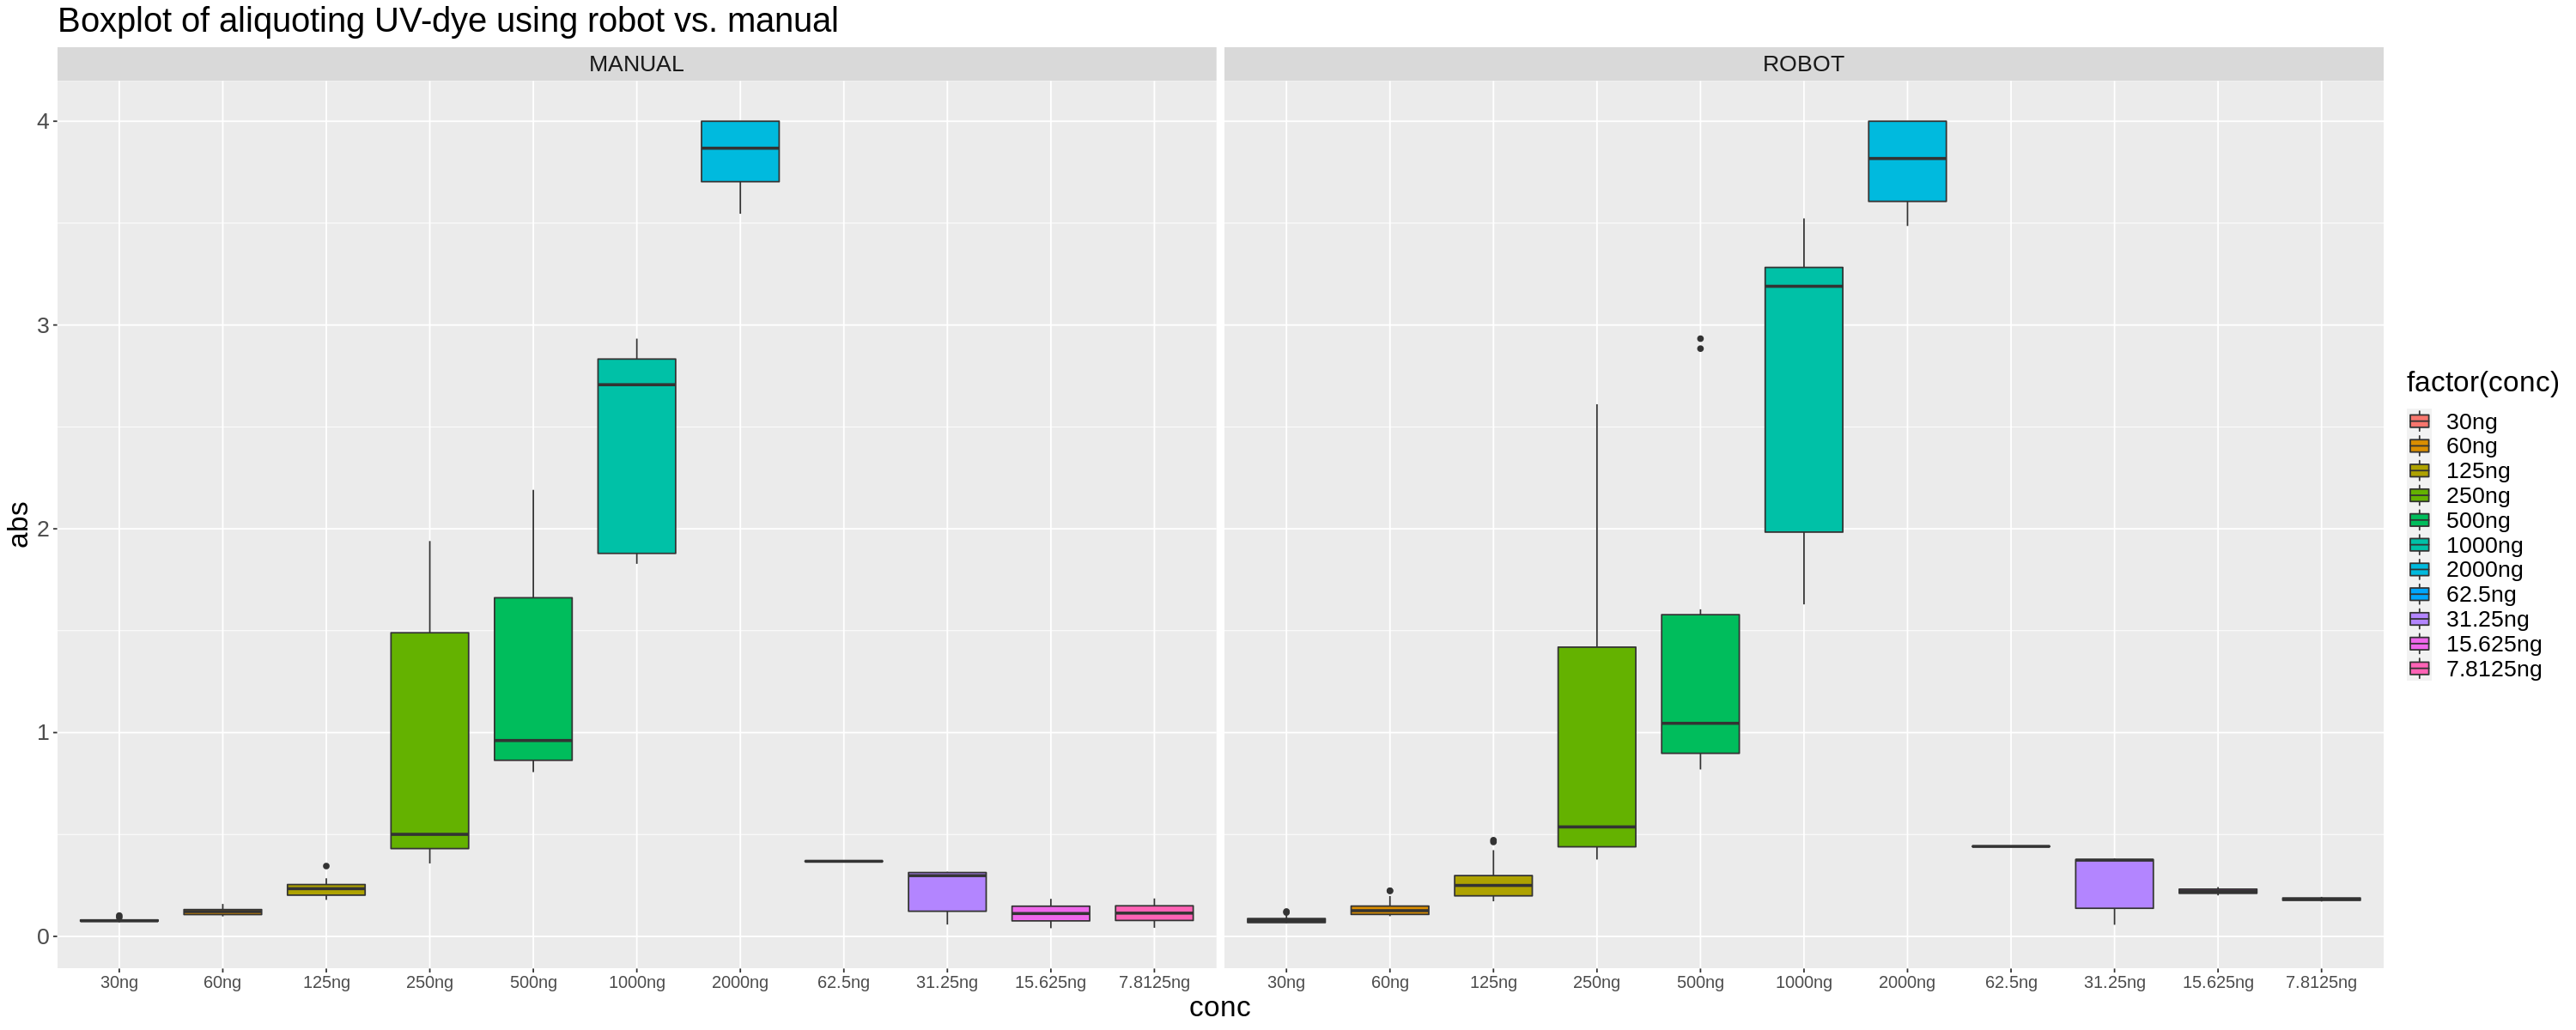

In [58]:
# box plot without outliers using IQR criterion
dfm %>%
    mutate(conc = factor(conc, levels=c('30ng','60ng', '125ng','250ng','500ng','1000ng','2000ng','62.5ng','31.25ng','15.625ng','7.8125ng'))) %>%
    ggplot(aes(x=conc,y=abs, group = conc, fill = factor(conc))) +
      geom_boxplot() + 
      labs(title="Boxplot of aliquoting UV-dye using robot vs. manual") +
      facet_wrap(~method) + 
      theme(text = element_text(size=20),
            axis.text.x = element_text(size = 12)) 

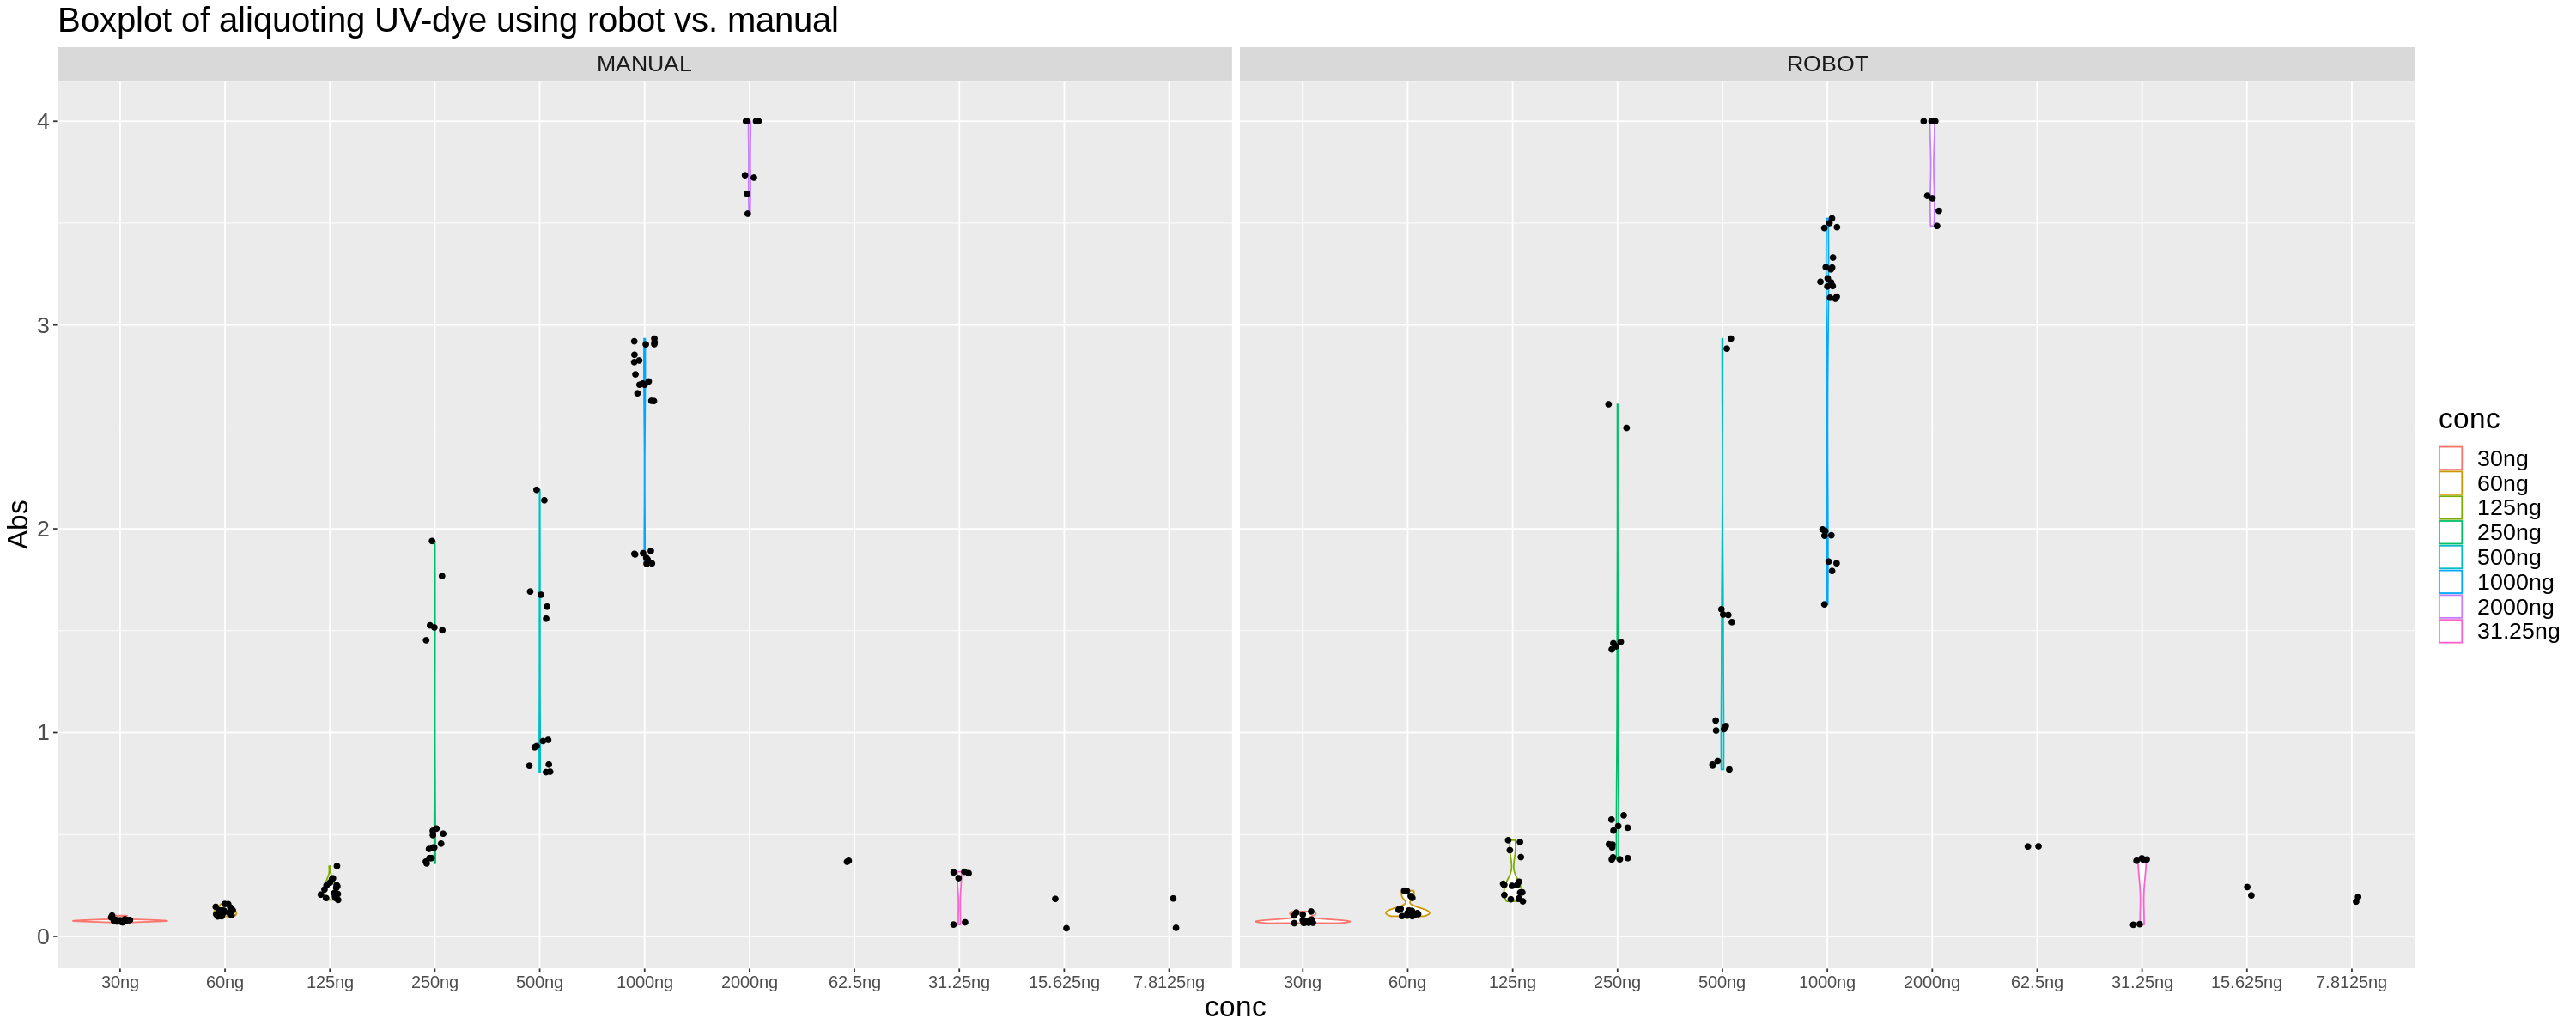

In [61]:
# violin plot without outliers using IQR Criterion 
dfm %>%
    mutate(conc = factor(conc, levels=c('30ng','60ng', '125ng','250ng','500ng','1000ng','2000ng','62.5ng','31.25ng','15.625ng','7.8125ng'))) %>%
    ggplot(aes(x=conc,y=abs, group = conc)) +
        geom_violin(aes(colour = conc)) + 
        geom_jitter(height = 0, width = 0.1) +
        labs(title="Boxplot of aliquoting UV-dye using robot vs. manual") +
        ylab("Abs") +
        facet_wrap(~method) + 
        theme(text = element_text(size=20),
            axis.text.x = element_text(size = 12)) 

In [167]:
dfm_wide <- reshape(data=dfm ,idvar= c("plate","method", "well_id"),
                          timevar = "conc",
                          direction="wide")
head(dfm_wide,15)

,plate,method,well_id,abs.30ng,abs.60ng,abs.125ng,abs.250ng,abs.500ng,abs.1000ng,abs.2000ng,abs.62.5ng,abs.31.25ng,abs.15.625ng,abs.7.8125ng
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,MANUAL,A2,0.076,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,1,MANUAL,B2,0.076,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,MANUAL,C3,0.069,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,1,MANUAL,D3,0.072,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,MANUAL,E4,0.075,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,1,MANUAL,F4,0.076,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,1,MANUAL,G5,0.102,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,1,MANUAL,H5,0.081,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,1,ROBOT,A2,0.067,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [168]:
dfm_avg <- dfm %>% group_by(method, plate, conc) %>% summarize(mean=mean(abs))
dfm_avg

`summarise()` regrouping output by 'method', 'plate' (override with `.groups` argument)



method,plate,conc,mean
<chr>,<int>,<chr>,<dbl>
MANUAL,1,1000ng,2.4745833
MANUAL,1,125ng,0.2316250
MANUAL,1,15.625ng,0.0400000
MANUAL,1,2000ng,3.7975000
MANUAL,1,250ng,0.8268889
MANUAL,1,30ng,0.0783750
MANUAL,1,31.25ng,0.3033333
MANUAL,1,500ng,1.2875714
MANUAL,1,60ng,0.1220000


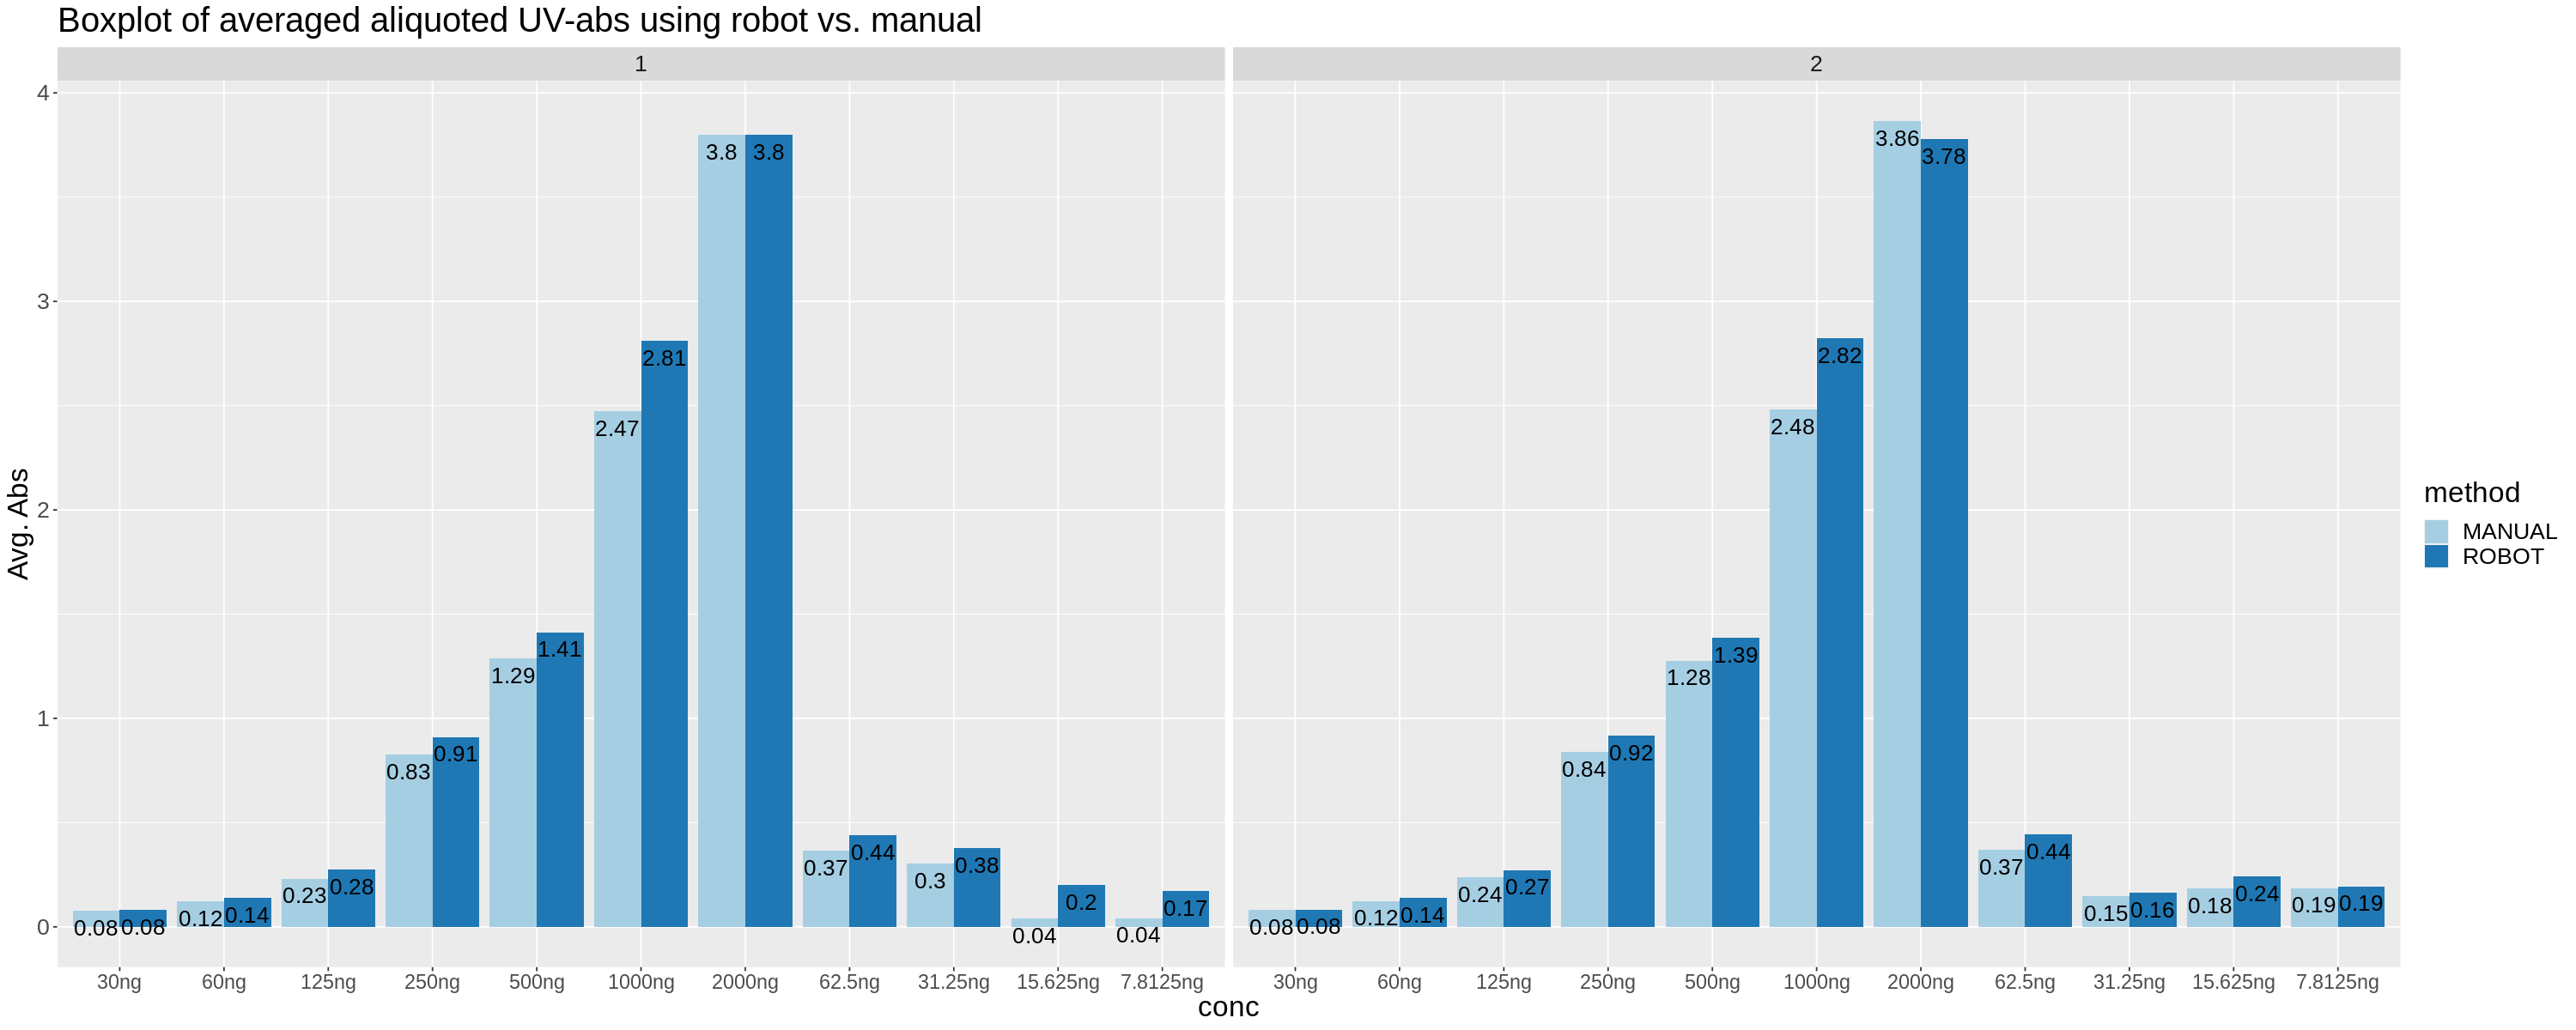

In [210]:
# averaging all the concs
dfm_avg %>%
    mutate(conc = factor(conc, levels=c('30ng','60ng', '125ng','250ng','500ng','1000ng','2000ng','62.5ng','31.25ng','15.625ng','7.8125ng'))) %>%
    ggplot(aes(x = conc, y = mean, group = method, fill = method)) +
        geom_bar(stat="identity", position=position_dodge()) + 
        geom_text(aes(label=round(mean,2)), vjust=1.6, color="black",
            position = position_dodge(0.9), size=5.5)+
        labs(title="Boxplot of averaged aliquoted UV-abs using robot vs. manual") +
        ylab("Avg. Abs") +
        facet_wrap(~plate) + 
        scale_fill_brewer(palette="Paired") + 
        theme(text = element_text(size=20),
            axis.text.x = element_text(size = 14)) 

In [212]:
dfm

conc,plate,method,abs,well_id
<chr>,<int>,<chr>,<dbl>,<chr>
30ng,1,MANUAL,0.076,A2
30ng,1,MANUAL,0.076,B2
30ng,1,MANUAL,0.069,C3
30ng,1,MANUAL,0.072,D3
30ng,1,MANUAL,0.075,E4
30ng,1,MANUAL,0.076,F4
30ng,1,MANUAL,0.102,G5
30ng,1,MANUAL,0.081,H5
30ng,1,ROBOT,0.067,A2


In [216]:
options(repr.plot.width=25, repr.plot.height=50)

Warning message:
“Removed 24 rows containing missing values (geom_hline).”
Warning message:
“Removed 24 rows containing missing values (geom_label).”


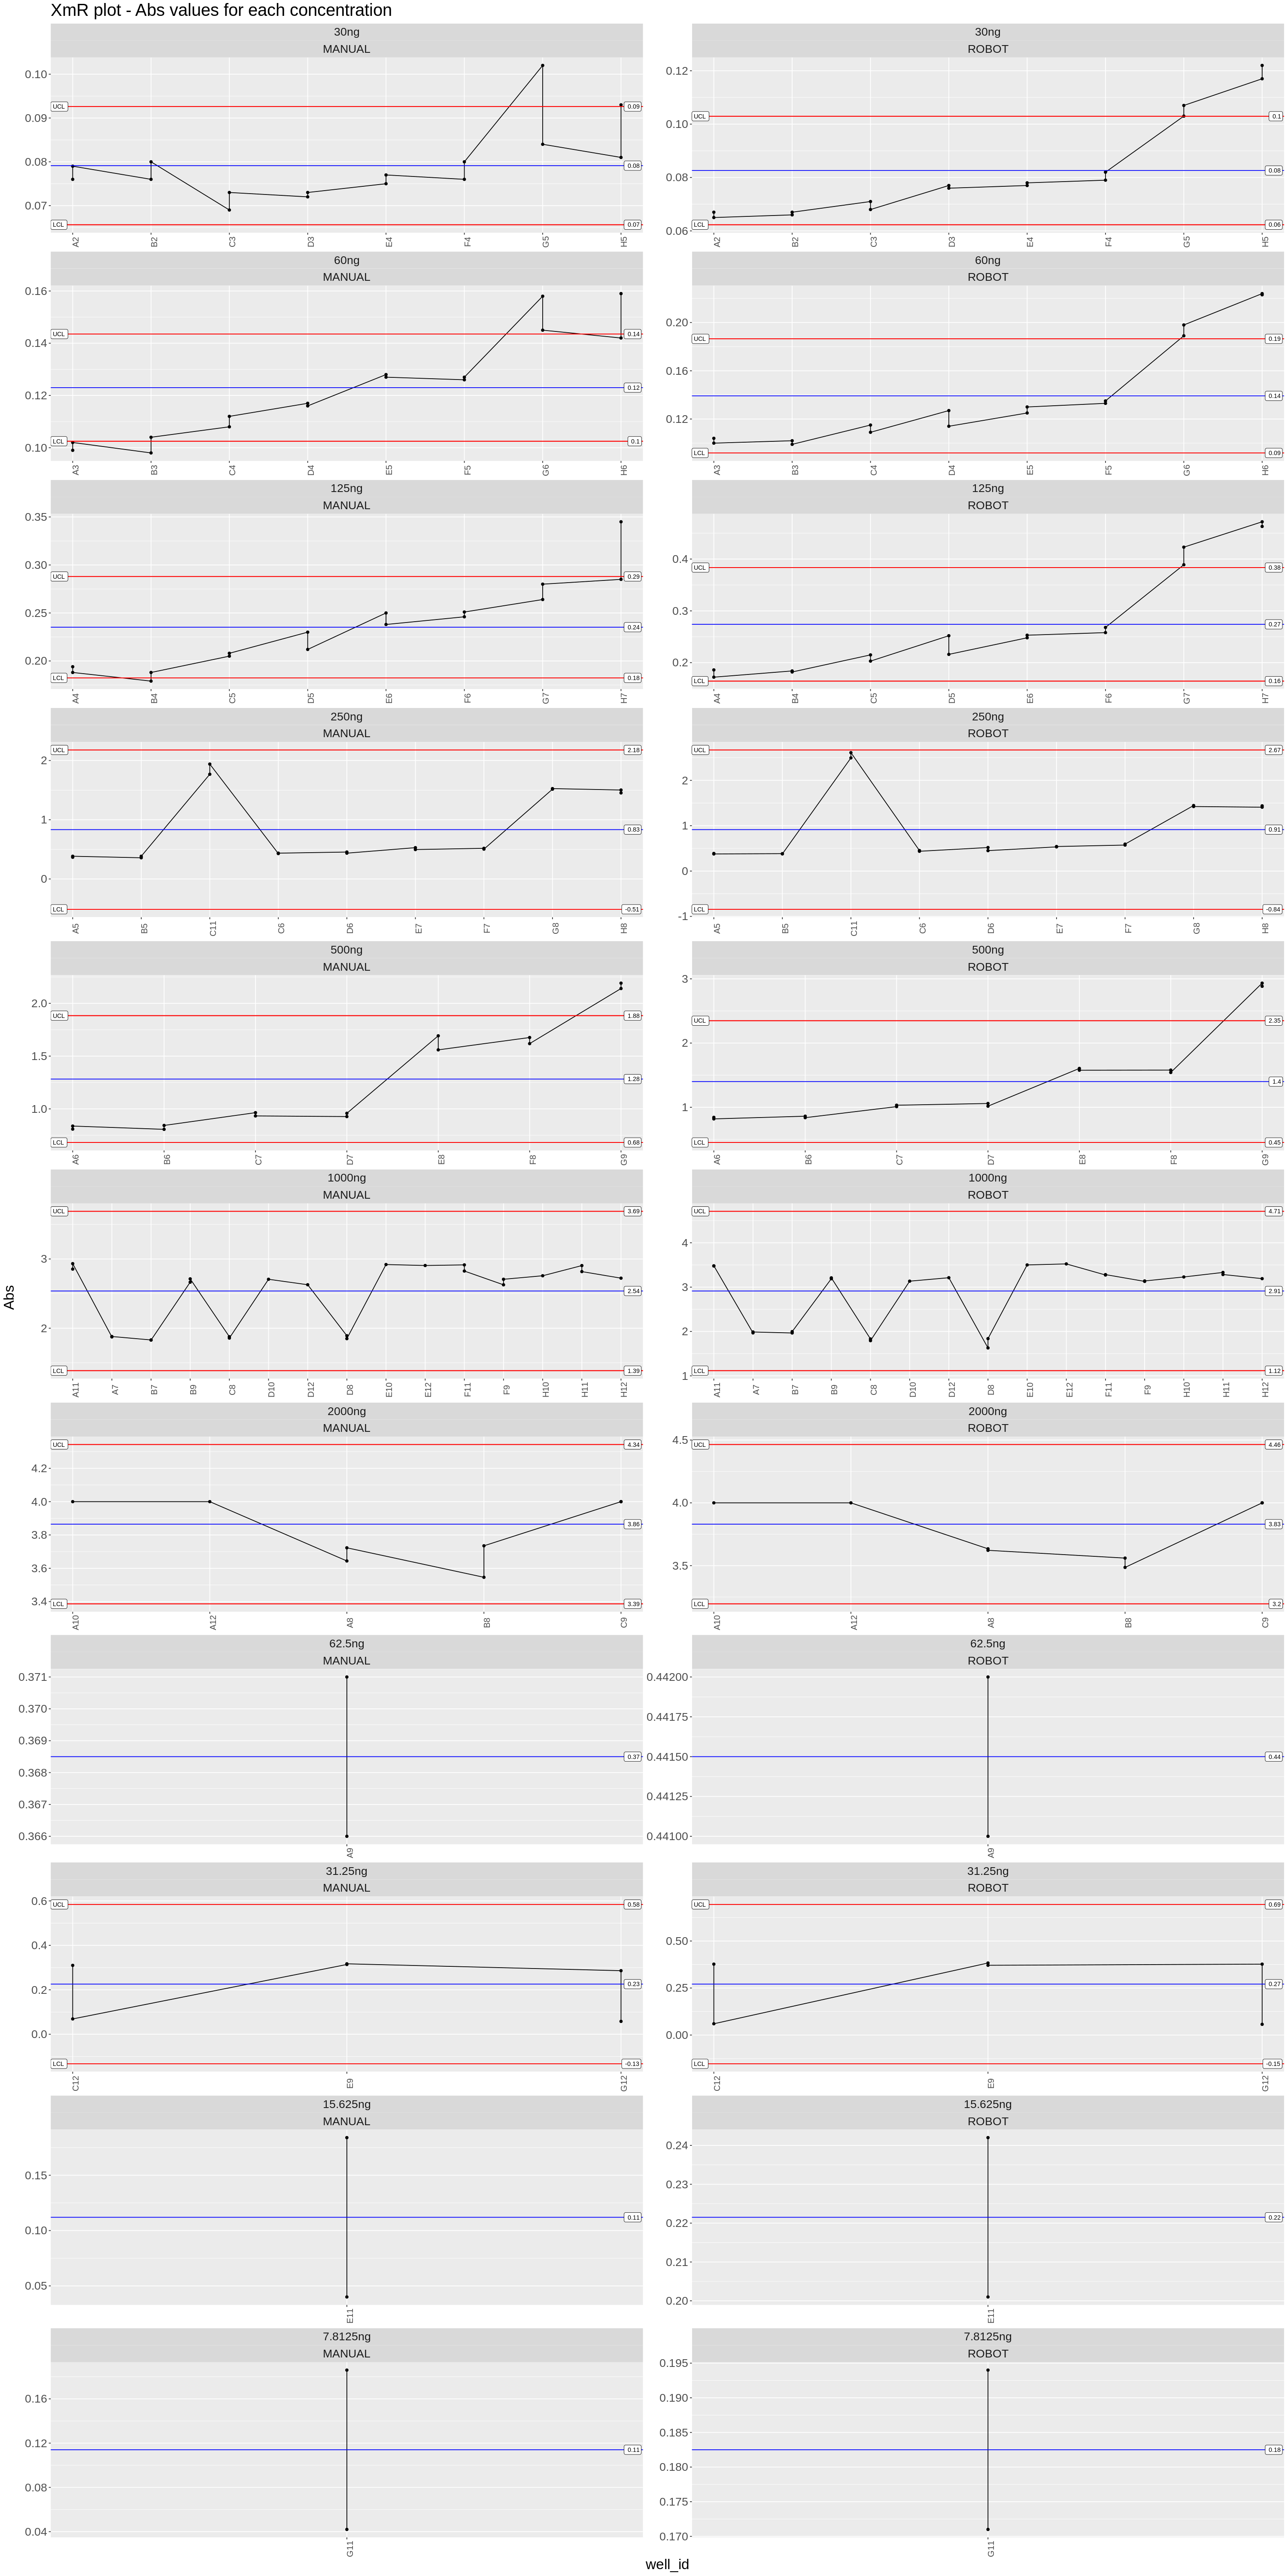

In [218]:
# XMR plots
dfm %>% 
mutate(conc = factor(conc, levels=c('30ng','60ng', '125ng','250ng','500ng','1000ng','2000ng','62.5ng','31.25ng','15.625ng','7.8125ng'))) %>%
    ggplot(aes(x=well_id, y=abs, group = conc)) +
      geom_point() + geom_line() +
      stat_QC(method="XmR", auto.label = T, label.digits = 2) + 
      ylab("Abs") +
      scale_x_discrete(expand =  expansion(mult = .04)) + 
      facet_wrap(conc~ method, nrow = 11, scales="free") + 
      ggtitle("XmR plot - Abs values for each concentration") +
      theme(text = element_text(size=20),
            axis.text.x = element_text(size = 12, angle = 90))

In [12]:
letters <- LETTERS[1:8]
plate_cols <- seq(12)

In [234]:
# Change plot size 
options(repr.plot.width=25, repr.plot.height=15)

In [223]:
head(dfm, 20)

,conc,plate,method,abs,well_id
,<chr>,<int>,<chr>,<dbl>,<chr>
1,30ng,1,MANUAL,0.076,A2
2,30ng,1,MANUAL,0.076,B2
3,30ng,1,MANUAL,0.069,C3
4,30ng,1,MANUAL,0.072,D3
5,30ng,1,MANUAL,0.075,E4
6,30ng,1,MANUAL,0.076,F4
7,30ng,1,MANUAL,0.102,G5
8,30ng,1,MANUAL,0.081,H5
9,30ng,1,ROBOT,0.067,A2


In [226]:
dfm %>% group_by(method, plate) %>% count()

method,plate,n
<chr>,<int>,<int>
MANUAL,1,62
MANUAL,2,62
ROBOT,1,62
ROBOT,2,62


In [229]:
nrow(dfm)

[1] 248

In [231]:
length(unique(dfm$well_id))

[1] 66

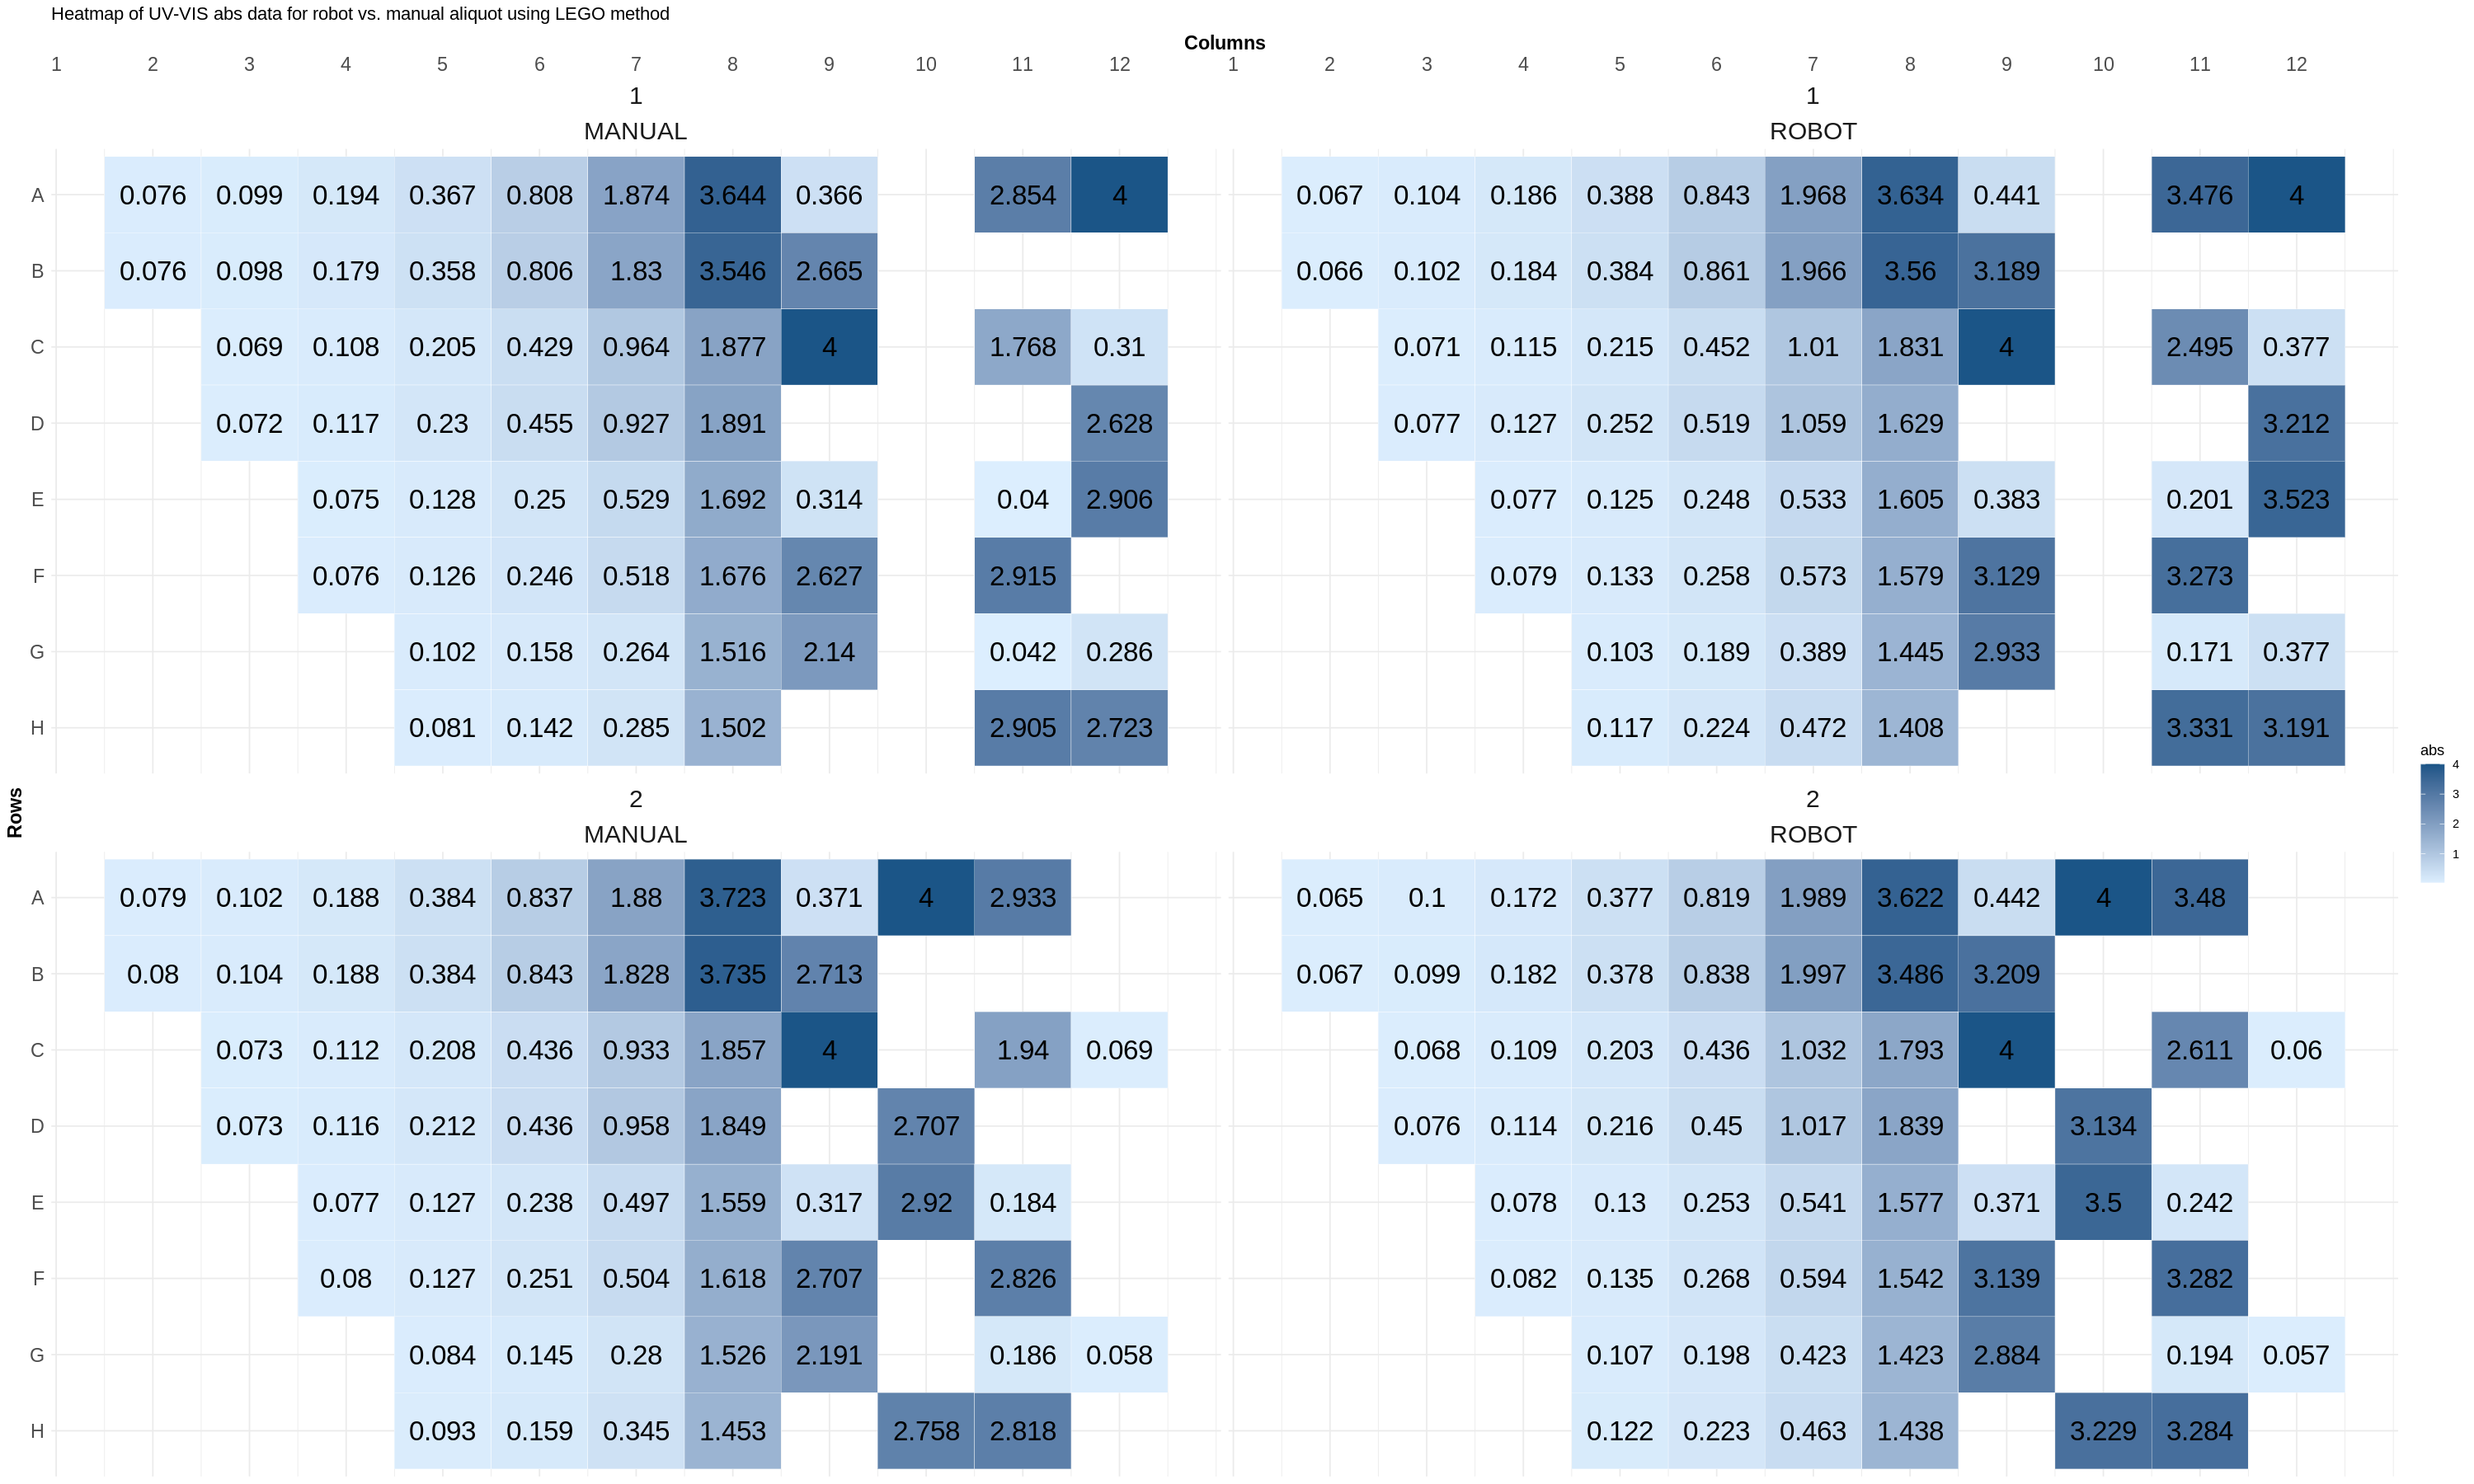

In [250]:
# heatmap
dfm %>% 
    mutate(conc = factor(conc, levels=c('30ng','60ng', '125ng','250ng','500ng','1000ng','2000ng','62.5ng','31.25ng','15.625ng','7.8125ng'))) %>%
        #ggplot(aes(x = as.numeric(substr(COL,2,2)), y = ordered(substr(wellid,1,1), levels=rev(letters)), fill=value)) +
        ggplot(aes(x = as.numeric(substr(well_id,2,nchar(well_id))), y = ordered(substr(well_id,1,1), levels=rev(LETTERS[seq(8)])), fill=abs, group = plate)) +
          geom_tile(color = "white") +
          scale_x_continuous(breaks=seq(12), position = "top") +
          geom_text(aes(label = round(abs,3)), size = 7) +
          #scale_colour_manual(values=c("white"="white", "black"="black"), guide = FALSE) +
          scale_fill_gradient(low="#DCEEFE", high="#1B5587") +
          theme_minimal() +
          ggtitle("Heatmap of UV-VIS abs data for robot vs. manual aliquot using LEGO method") + # for the main title
          xlab("Columns") + 
          ylab("Rows") +
          facet_wrap(plate~method) +
          theme( axis.text = element_text(size = 14),
                   axis.title = element_text(size = 14, face = "bold" ),
                   strip.text = element_text(size = 18))